In [1]:
from utils import TreeNode, Tree
from copy import copy, deepcopy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Boxplots, changing discount

In [2]:
n_samples = 1000

depth = 10
branching_factor = 2
n = 10

In [3]:
regrets_uniform, regrets_optimistic = [], []
discount_factors = [0.2, 0.5, 0.8]

for discount_factor in discount_factors:
    r_unif, r_opt = [], []
    for i in range(n_samples):
        tree_uniform = Tree(depth, branching_factor, n, discount_factor)
        reward = tree_uniform.uniform_search()
        r_unif.append(tree_uniform.compute_regret(reward))

        tree_optimistic = Tree(depth, branching_factor, n, discount_factor)
        reward = tree_optimistic.optimistic_search()
        r_opt.append(tree_optimistic.compute_regret(reward))
    regrets_uniform.append(r_unif)
    regrets_optimistic.append(r_opt)

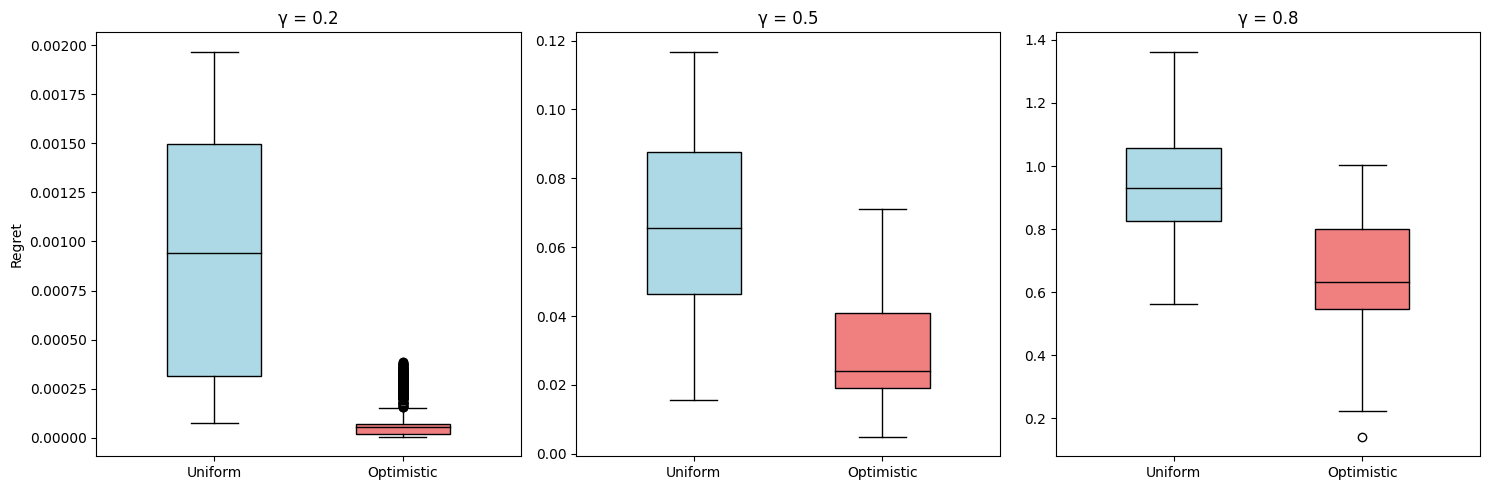

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=len(discount_factors), figsize=(15, 5))

for i, discount_factor in enumerate(discount_factors):
    # Plotting boxplots for both regrets_uniform and regrets_optimistic
    # axs[i].boxplot([regrets_uniform[i], regrets_optimistic[i]], positions=[0, 0.8], widths=0.4, patch_artist=True,
    #                boxprops=dict(facecolor='lightblue', color='blue'),  # For uniform regrets
    #                whiskerprops=dict(color='blue'),
    #                capprops=dict(color='blue'),
    #                medianprops=dict(color='blue'))

    axs[i].boxplot([regrets_uniform[i]], positions=[0], widths=0.4, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='black'),  # For uniform regrets
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='black'))
    
    axs[i].boxplot([regrets_optimistic[i]], positions=[0.8], widths=0.4, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', color='black'),  # For uniform regrets
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='black'))
    
    axs[i].set_xticks([0, 0.8])
    axs[i].set_xticklabels(['Uniform', 'Optimistic'])
    axs[i].set_title(f'γ = {discount_factor}')

    # Adding y-label only on the leftmost plot
    if i == 0:
        axs[i].set_ylabel('Regret')

plt.tight_layout()
plt.savefig("boxplots.pdf")
plt.show()